In [1]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from collections import Counter

In [2]:
path = '../input/'

In [3]:
with open(f'{path}mission-dtypes.yaml', 'r') as yamlfile:
    mission_dtypes = yaml.load(yamlfile)

In [4]:
with open(f'{path}passenger-dtypes.yaml', 'r') as yamlfile:
    passenger_dtypes = yaml.load(yamlfile)

In [5]:
read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8',
#                  'dtype': dtypes,
                 'parse_dates': ['MissionDate'],
                 'infer_datetime_format': True}

In [6]:
df = pd.read_csv(f'{path}ice-air-missions.csv.gz', **read_csv_opts, dtype=mission_dtypes)

In [7]:
passengers = pd.read_csv(f'{path}ice-air-passengers.csv.gz', **read_csv_opts, dtype=passenger_dtypes)

In [8]:
print(len(df))
print(len(passengers))

16967
1826402


In [9]:
stop_cols = ['MsnStart',
             'MsnStpOne',
             'MsnStpTwo',
             'MsnStpThree',
             'MsnStpFour',
             'MsnStpFive',
             'MsnStpSix',
             'MsnStpSeven',
             'MsnStpEight',
             'MsnEnd']

In [10]:
df.head()

,MissionID,MissionNumber,MsnTailNumber,MissionDate,MissionFY,MissionMonth,MissionWeek,MsnStart,MsnStpOne,MsnStpTwo,...,MissionQuarter,MissionYear,MissionTotalCost,MissionPassengers,LegPassengers,MissionUtilization,LegUtilization,ManifestedPassengers,StruckPassengers,PlannedMissionUtilization
0,105,110005,N772AS,2010-10-01,2011,10,40,KSAT,KMDT,KAEX,...,4,2010,0.0,125,NaN,NaN,NaN,NaN,NaN,NaN
1,106,110006,N125MN,2010-10-01,2011,10,40,KSAT,KHRL,MGGT,...,4,2010,0.0,136,NaN,NaN,NaN,NaN,NaN,NaN
2,107,110007,N743VA,2010-10-01,2011,10,40,KAEX,MHLM,NaN,...,4,2010,0.0,100,NaN,NaN,NaN,NaN,NaN,NaN
3,108,110008,N974AS,2010-10-01,2011,10,40,KAEX,KORD,KMCI,...,4,2010,50641.5,139,NaN,NaN,NaN,NaN,NaN,NaN
4,131,110002,N120MN,2010-10-01,2011,10,40,KIWA,KOAK,KBFL,...,4,2010,42191.1,114,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16967 entries, 0 to 16966
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   MissionID                  16967 non-null  uint16        
 1   MissionNumber              16967 non-null  uint32        
 2   MsnTailNumber              16966 non-null  category      
 3   MissionDate                16967 non-null  datetime64[ns]
 4   MissionFY                  16967 non-null  uint16        
 5   MissionMonth               16967 non-null  uint8         
 6   MissionWeek                16967 non-null  uint8         
 7   MsnStart                   16967 non-null  category      
 8   MsnStpOne                  16838 non-null  category      
 9   MsnStpTwo                  12421 non-null  category      
 10  MsnStpThree                5375 non-null   category      
 11  MsnStpFour                 1662 non-null   category      
 12  MsnS

In [12]:
df.columns

Index(['MissionID', 'MissionNumber', 'MsnTailNumber', 'MissionDate',
       'MissionFY', 'MissionMonth', 'MissionWeek', 'MsnStart', 'MsnStpOne',
       'MsnStpTwo', 'MsnStpThree', 'MsnStpFour', 'MsnStpFive', 'MsnStpSix',
       'MsnStpSeven', 'MsnStpEight', 'MsnEnd', 'msnDelayReason',
       'msnCancelReason', 'msnFlightODCCost', 'msnProposedFines',
       'msnEnforcedFines', 'msnGeneralFlightCost', 'msnFlightHoursPlanned',
       'msnFlightHoursActual', 'msnCharterDesignation', 'Status', 'msnVendor',
       'msnInvoiceNumber', 'MissionQuarter', 'MissionYear', 'MissionTotalCost',
       'MissionPassengers', 'LegPassengers', 'MissionUtilization',
       'LegUtilization', 'ManifestedPassengers', 'StruckPassengers',
       'PlannedMissionUtilization'],
      dtype='object')

In [13]:
df['MissionTotalCost'].describe()

count    1.696000e+04
mean     5.802397e+04
std      5.016311e+04
min     -8.028720e+04
25%      4.651560e+04
50%      5.846310e+04
75%      7.052851e+04
max      1.492806e+06
Name: MissionTotalCost, dtype: float64

In [14]:
df['MissionTotalCost'].max()

1492806.04

In [15]:
df.sort_values(by='MissionTotalCost', ascending=False).head(10)

,MissionID,MissionNumber,MsnTailNumber,MissionDate,MissionFY,MissionMonth,MissionWeek,MsnStart,MsnStpOne,MsnStpTwo,...,MissionQuarter,MissionYear,MissionTotalCost,MissionPassengers,LegPassengers,MissionUtilization,LegUtilization,ManifestedPassengers,StruckPassengers,PlannedMissionUtilization
14737,46009,180497,N351AX,2018-02-12,2018,2,7,KELP,PHNL,PGUM,...,1,2018,1492806.04,121,NaN,NaN,NaN,NaN,NaN,NaN
15169,46439,180803,N477AX,2018-05-15,2018,5,20,KELP,PHNL,PGUM,...,2,2018,1368815.78,48,NaN,NaN,NaN,NaN,NaN,NaN
16137,47420,190003,N828AX,2018-11-29,2019,11,48,KIWA,HKMM,HKJK,...,4,2018,1336139.61,117,NaN,0.866667,NaN,117.0,0.0,0.866667
13436,38925,170904,N225AX,2017-04-18,2017,4,16,KIWA,PHNL,VIDP,...,2,2017,1304465.21,106,NaN,NaN,NaN,NaN,NaN,NaN
16223,47533,190244,N342AX,2018-12-17,2019,12,51,KELP,PHNL,PGUM,...,4,2018,1197313.67,94,NaN,0.696296,NaN,94.0,0.0,0.696296
14186,36150,180002,N207AX,2017-10-11,2018,10,41,KIWA,PHNL,PGUM,...,4,2017,1139608.45,91,NaN,NaN,NaN,NaN,NaN,NaN
13789,39278,171173,N225AX,2017-07-16,2017,7,29,KIWA,PHNL,PGUM,...,3,2017,1065622.12,86,NaN,NaN,NaN,NaN,NaN,NaN
12816,38305,170149,N225AX,2016-12-06,2017,12,50,KAEX,PHNL,PGUM,...,4,2016,1061575.02,85,NaN,NaN,NaN,NaN,NaN,NaN
14490,45760,180261,N207AX,2017-12-18,2018,12,51,KELP,PHNL,PGUM,...,4,2017,1059073.36,47,NaN,NaN,NaN,NaN,NaN,NaN
12677,38166,170035,N225AX,2016-11-08,2017,11,46,KIWA,VIDP,VGHS,...,4,2016,1016707.48,82,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df['MissionDate'] = pd.to_datetime(df['MissionDate'])

In [17]:
df['MissionDate'].describe()

count                   16967
unique                   2566
top       2012-06-27 00:00:00
freq                       13
first     2010-10-01 00:00:00
last      2019-05-04 00:00:00
Name: MissionDate, dtype: object

In [18]:
len(df[df['MissionTotalCost'] < 0])

16

In [19]:
df['MissionTotalCost'].sum()

984086606.05

In [20]:
len(df[df['MissionTotalCost'] == 0])

1560

In [21]:
len(df[df['MissionTotalCost'] == 0]) / len(df) * 100

9.194318382742972

In [22]:
len(df[df['MissionPassengers'] == 0])

1239

In [23]:
df['MissionPassengers'].describe()

count    16967.000000
mean       116.740555
std         52.181480
min          0.000000
25%         94.000000
50%        126.000000
75%        142.000000
max        476.000000
Name: MissionPassengers, dtype: float64

In [24]:
df['CostPerPassenger'] = df['MissionTotalCost'] / df['MissionPassengers']

In [25]:
df['CostPerPassenger'] = df['CostPerPassenger'].replace([np.inf, -np.inf], np.nan)

In [26]:
df['CostPerPassenger'].describe()

count     15722.000000
mean        828.765561
std        4494.658058
min        -484.489655
25%         362.661250
50%         471.251048
75%         624.670758
max      328000.000000
Name: CostPerPassenger, dtype: float64

In [27]:
q_all = df.set_index('MissionDate').resample('Q')
q_greaterthanzero = df[df['MissionTotalCost'] > 0].set_index('MissionDate').resample('Q')
q_greaterthanequaltozero = df[df['MissionTotalCost'] >= 0].set_index('MissionDate').resample('Q')

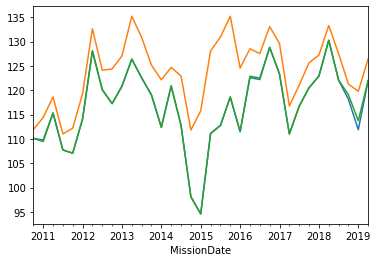

In [28]:
q_all['MissionPassengers'].mean().plot()
q_greaterthanzero['MissionPassengers'].mean().plot()
q_greaterthanequaltozero['MissionPassengers'].mean().plot()

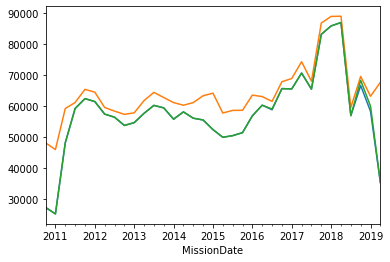

In [29]:
q_all['MissionTotalCost'].mean().plot()
q_greaterthanzero['MissionTotalCost'].mean().plot()
q_greaterthanequaltozero['MissionTotalCost'].mean().plot()

In [30]:
df['msnVendor'] = df['msnVendor'].str.upper()

In [31]:
vendors = df.set_index('MissionDate').resample('AS-OCT')['msnVendor'].value_counts(dropna=False)

In [32]:
vendors = vendors[vendors > 25]

In [33]:
vendors = vendors.unstack()

In [34]:
vendors.index = vendors.index.year + 1

In [35]:
vendors

msnVendor,NaN,CSI,ACT,CAC,ATS
MissionDate,,,,,
2011,2129.0,26.0,NaN,NaN,NaN
2012,89.0,2295.0,NaN,NaN,NaN
2013,144.0,2066.0,119.0,NaN,NaN
2014,1145.0,1118.0,107.0,NaN,NaN
2015,1643.0,NaN,NaN,NaN,NaN
2016,1359.0,177.0,NaN,NaN,NaN
2017,74.0,1557.0,NaN,NaN,NaN
2018,56.0,1193.0,NaN,423.0,30.0
2019,126.0,NaN,NaN,985.0,NaN


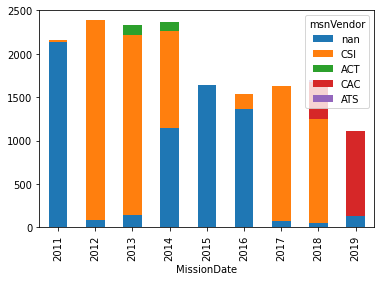

In [36]:
vendors.plot(kind='bar', stacked=True)

In [37]:
df.set_index('MissionDate').loc['2017', 'msnVendor'].value_counts(dropna=False)

CSI       1496
NaN         75
ATS         34
ZEPHYR       1
Name: msnVendor, dtype: int64

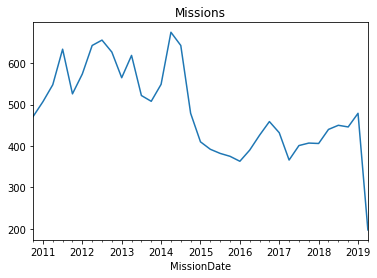

In [38]:
df.set_index('MissionDate').resample('Q')['MissionID'].count().plot(title='Missions')

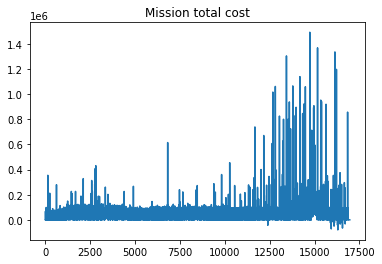

In [39]:
df['MissionTotalCost'].plot(title='Mission total cost')

In [40]:
def bar_chart(data, title=str, subtitle=str):
    fig, ax = plt.subplots()

    data.plot(kind='bar',
              ax=ax,
              stacked=True,
              title=title,
              rot=0,
              grid=True,
              figsize=(8,6),
              fontsize=14)
    ax.set_axisbelow(True)
    ax.set_facecolor('#EEEEEE')
    ax.grid(color='#FFFFFF')
#     ax.set_ylabel('USD', fontsize=16)
    ax.set_ylim(0)
    ax.set_xlabel('Fiscal Year', fontsize=16)
    
    fmt = '${x:,.0f}'
    tick = ticker.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    
    ax.tick_params(labelsize=14)
    legend = ax.legend()
    legend.remove()
    txt='*First 6 months\n(Source: UWCHR, ICE Air ARTS database)'
    plt.figtext(.9, 0, txt, wrap=True, horizontalalignment='right', fontsize=12)
    
    plt.suptitle(f'{title}', y=.95, fontsize=18)
    plt.title(f'{subtitle}', fontsize=14)
    
    fig.set_size_inches(10, 8)
#     fig.savefig(f'../output/{airport}_{filename}.png')
    plt.show()
    plt.close()

In [41]:
data = pd.DataFrame(df.set_index('MissionDate').resample('AS-OCT')['MissionTotalCost'].mean())

In [42]:
data.index = data.index.year+1 
data.index.name = 'Fiscal Year'
data = data.rename({2019: '2019*'})
data = data.rename({'MissionTotalCost': 'Avg. cost per mission'}, axis=1)

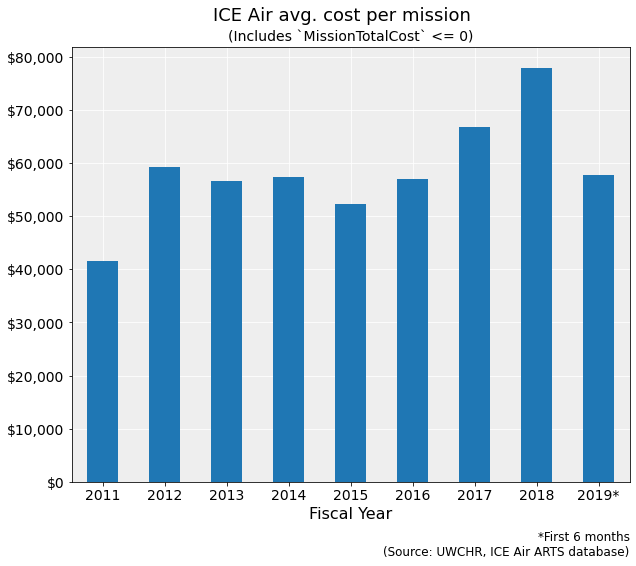

In [43]:
bar_chart(data, title='ICE Air avg. cost per mission', subtitle='(Includes `MissionTotalCost` <= 0)')

In [44]:
data = pd.DataFrame(df[df['MissionTotalCost'] > 0].set_index('MissionDate').resample('AS-OCT')['MissionTotalCost'].mean())

data.index = data.index.year+1 
data.index.name = 'Fiscal Year'

data = data.rename({2019: '2019*'})
data = data.rename({'MissionTotalCost': 'Avg. cost per mission'}, axis=1)

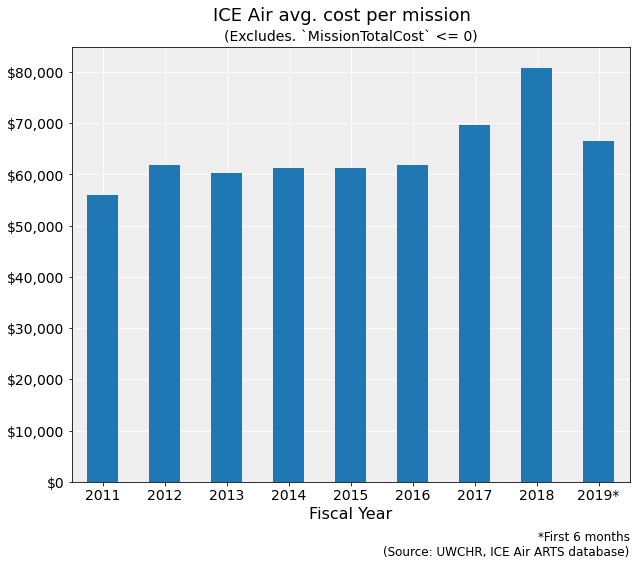

In [45]:
bar_chart(data, title='ICE Air avg. cost per mission', subtitle='(Excludes. `MissionTotalCost` <= 0)')

In [46]:
resample_fy = df.set_index('MissionDate').resample('AS-OCT')
data = pd.DataFrame(resample_fy['MissionTotalCost'].sum())
data.index = data.index.year+1 
data.index.name = 'Fiscal Year'
data = data.rename({2019: '2019*'})
data = data.rename({'MissionTotalCost': 'ICE Air Mission Costs'}, axis=1)

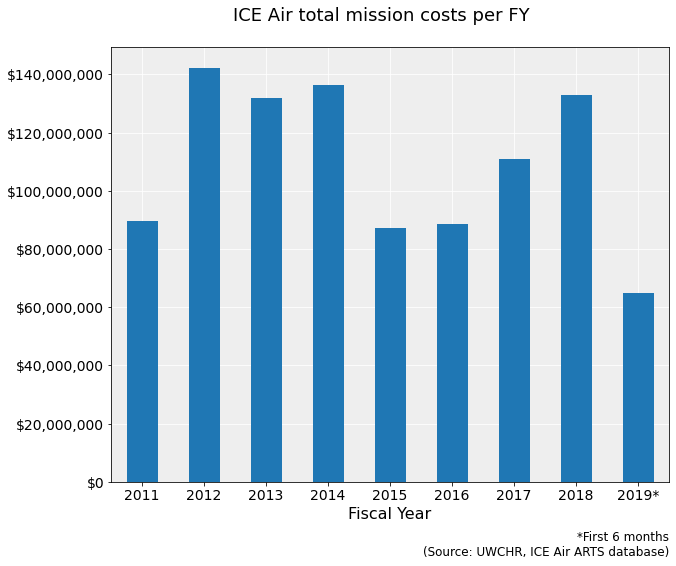

In [47]:
bar_chart(data, title='ICE Air total mission costs per FY', subtitle='')

In [48]:
resample_fy = df.set_index('MissionDate').resample('AS-OCT')
data = pd.DataFrame(resample_fy['CostPerPassenger'].mean())
data.index = data.index.year+1 
data.index.name = 'Fiscal Year'

data = data.rename({2019: '2019*'})
data = data.rename({'CostPerPassenger': 'Avg. cost per passenger'}, axis=1)

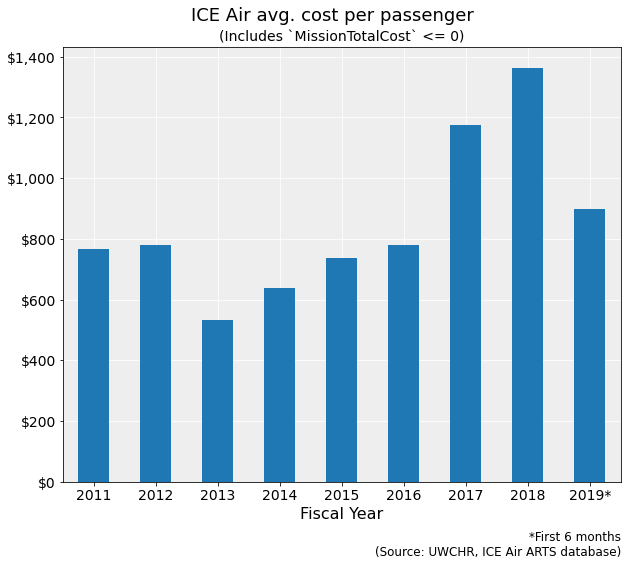

In [49]:
bar_chart(data, title='ICE Air avg. cost per passenger', subtitle='(Includes `MissionTotalCost` <= 0)')

In [50]:
resample_fy = df[df['MissionTotalCost'] > 0].set_index('MissionDate').resample('AS-OCT')
data = pd.DataFrame(resample_fy['CostPerPassenger'].mean())
data.index = data.index.year+1 
data.index.name = 'Fiscal Year'

data = data.rename({2019: '2019*'})
data = data.rename({'CostPerPassenger': 'Avg. cost per passenger'}, axis=1)

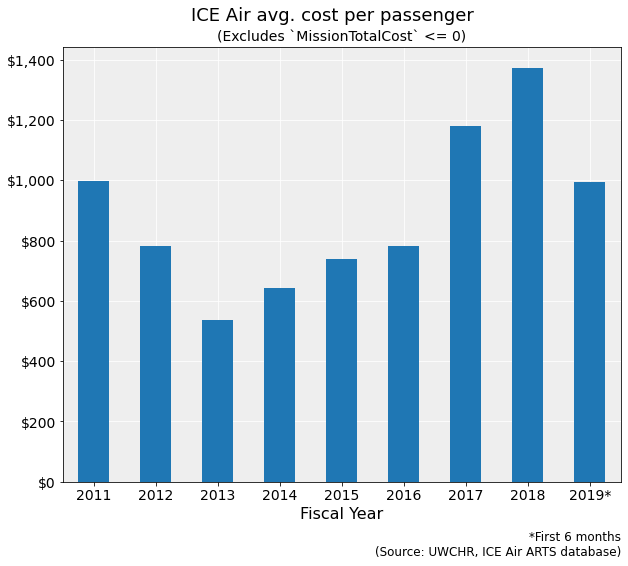

In [51]:
bar_chart(data, title='ICE Air avg. cost per passenger', subtitle='(Excludes `MissionTotalCost` <= 0)')

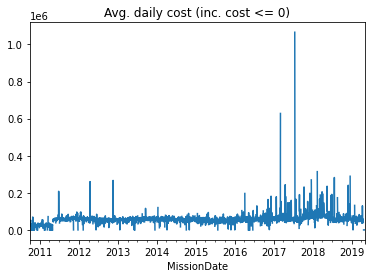

In [52]:
resample_d = df.set_index('MissionDate').resample('D')
resample_d['MissionTotalCost'].mean().plot(title='Avg. daily cost (inc. cost <= 0)')

In [53]:
df_greaterthanzero.resample('M')['MissionTotalCost'].mean().plot(title='Avg. monthly cost per mission')

NameError: name 'df_greaterthanzero' is not defined

In [ ]:
df.resample('M')['MissionTotalCost'].sum().plot()

In [ ]:
df_greaterthanzero.resample('Q')['CostPerPassenger'].mean().plot(title='Avg. Cost per passenger')

In [55]:
df_greaterthanzero.resample('AS-OCT')['MissionPassengers'].sum().plot()

NameError: name 'df_greaterthanzero' is not defined

In [56]:
df['msnCharterDesignation'].value_counts()

IWA #3           2374
AEX #1           2073
SAT #1           2021
IWA #1           1972
AEX #2           1890
MIA              1703
IWA #2           1576
SAT #2           1308
BRO #1           1086
BRO #2            404
LRIC              230
SAT #3            135
MIRP               78
IWA #4             53
MIA #2             28
Cuba Contract      11
AEX #3              8
MIA #1              3
mirp                2
Aex #2              1
sat #2              1
IWA#2               1
IWA3                1
Iwa #2              1
Mia                 1
IWA#3               1
Name: msnCharterDesignation, dtype: int64

In [57]:
df['msnVendor'] = df['msnVendor'].str.upper()

In [59]:
df['msnVendor'].value_counts()

CSI                       8432
CAC                       1408
ACT                        226
ATS                         66
PJS                         19
ZEPHYR                      17
AIR PARTNER                 14
JEFT EDGE                    6
EXECUTIVE FLIGHTWAYS         1
-                            1
OCS                          1
AIR CHARTER SERVICE          1
PEGASUS ELITE AVIATION       1
7962                         1
6.05                         1
VDI                          1
8.92                         1
AIR AMBULACE                 1
9003A                        1
ADVANCE AIR AMBULANCE        1
MIAMI AIR INTL               1
ATC                          1
Name: msnVendor, dtype: int64

In [64]:
wal_tail

['N801WA', 'N805WA', 'N806WA', 'N807TR', 'N808WA', 'N804WA']

In [62]:
df['MsnTailNumber'] = df['MsnTailNumber'].str.upper()

In [71]:
wal = df[df['MsnTailNumber'].isin(wal_tail)]

In [73]:
df['MsnTailNumber'].value_counts().head(10)

N804WA    1079
N125MN    1008
N836NK     977
N806WA     866
N418US     855
N593AN     725
N43XA      712
N305FA     685
N803WA     649
N802WA     555
Name: MsnTailNumber, dtype: int64

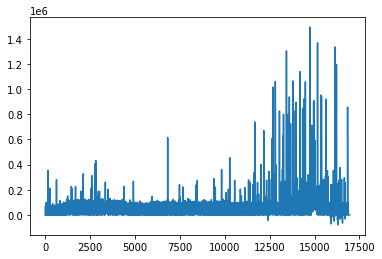

In [74]:
df['MissionTotalCost'].plot()

In [75]:
df['MissionTotalCost'].resample('AS-OCT').mean().plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [76]:
df['MissionPassengers'].resample('AS-OCT').mean().plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [77]:
df['CostPerPassenger'].resample('AS-OCT').mean().plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

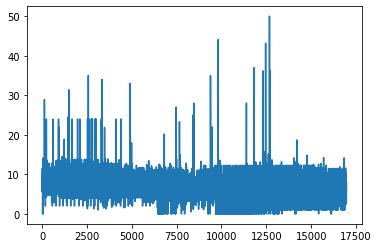

In [78]:
df['msnFlightHoursPlanned'].plot()

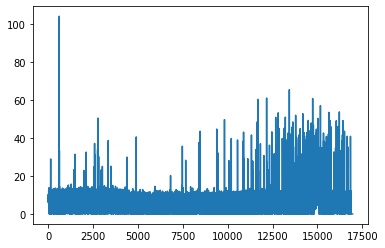

In [79]:
df['msnFlightHoursActual'].plot()

In [80]:
df['msnFlightHoursActual'].resample('AS-OCT').mean().plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [81]:
df['CostPerFlightHour'] = df['MissionTotalCost'] / df['msnFlightHoursActual']
df['CostPerFlightHour'] = df['CostPerFlightHour'].replace([np.inf, -np.inf], np.nan)

In [82]:
df['CostPerFlightHour'].resample('AS-OCT').mean().plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
vendor = df.groupby('msnVendor')

In [83]:
vendor['CostPerFlightHour'].mean().sort_values(ascending=False)

NameError: name 'vendor' is not defined

In [84]:
vendor['CostPerPassenger'].median().sort_values(ascending=False)

NameError: name 'vendor' is not defined

In [85]:
vendor['MissionTotalCost'].median().sort_values(ascending=False).head(10)

NameError: name 'vendor' is not defined

In [86]:
vendor['msnFlightHoursActual'].median().sort_values(ascending=False).head(12)

NameError: name 'vendor' is not defined

In [87]:
vendor['MissionID'].count().sort_values(ascending=False)

NameError: name 'vendor' is not defined

In [88]:
sum(df['msnVendor'].isnull())

6765

In [89]:
len(df)

16967

In [ ]:
df.groupby([pd.Grouper(freq='AS-OCT'), 'msnVendor'])['MissionID'].count().unstack().T

In [ ]:
df['msnCharterDesignation'] = df['msnCharterDesignation'].str.upper()

In [ ]:
lric = df['msnCharterDesignation'] == 'LRIC'

In [ ]:
df[lric].resample('AS-OCT')['MissionID'].count().plot()

In [ ]:
df.groupby('msnCharterDesignation')['MissionTotalCost'].median()

In [ ]:
df.groupby([pd.Grouper(freq='AS-OCT'), 'msnCharterDesignation'])['MissionTotalCost'].median().unstack().T

In [ ]:
df['ZeroTotalCost'] = df['MissionTotalCost'] <= 0

In [ ]:
df['ZeroTotalCost'].resample('D').sum().plot()

In [ ]:
df['cancelled'] = df['msnCancelReason'].notnull()

In [ ]:
df[df['cancelled'] == True]['MissionTotalCost'].plot()

In [ ]:
df['msnFlightODCCost'].plot()

In [ ]:
df.groupby('msnCharterDesignation')['msnFlightODCCost'].mean()

In [ ]:
df['msnProposedFines'].plot()

In [ ]:
df['msnEnforcedFines'].plot()

In [ ]:
df.groupby('msnCharterDesignation')['msnEnforcedFines'].mean()

In [ ]:
df.sort_values(by='msnEnforcedFines', ascending=False).head().T

In [ ]:
df.groupby('msnCancelReason')['msnEnforcedFines'].mean()

In [ ]:
df['msnCancelReason'].value_counts()

In [ ]:
df.groupby('msnDelayReason')['msnEnforcedFines'].mean()

In [ ]:
df['msnCancelReason'].value_counts()

In [ ]:
df[lric].resample('AS-OCT')['msnVendor'].value_counts()

In [ ]:
df[lric].groupby([pd.Grouper(freq='AS-OCT'), 'msnVendor'])['CostPerPassenger'].mean()

In [ ]:
df[lric]['msnFlightHoursActual'].mean()

In [ ]:
df[lric]['msnFlightHoursActual'].median()

In [ ]:
df[lric].groupby([pd.Grouper(freq='AS-OCT'), 'msnVendor'])['msnFlightHoursActual'].mean()

In [ ]:
df[stop_cols].melt()['value'].value_counts().head(20)

In [ ]:
pd.crosstab(**df[stop_cols].melt(var_name='columns', value_name='index'))

In [ ]:
df.loc[df['MissionTotalCost'].idxmax()][stop_cols]

# Finding missions with at least 1 stop at given target airport(s)

In [91]:
df = wal

In [92]:
targets = ['KBRO']
target_found = df[stop_cols].apply(lambda x: x.isin(targets)).sum(axis=1) > 0

In [93]:
sum(target_found)

1117

In [94]:
df[target_found]['MissionTotalCost'].sum()

60880281.19

In [95]:
df[target_found][stop_cols].melt()['value'].value_counts().head(10)

KBRO    1855
KAEX     576
MGGT     305
KMIA     273
KSAT     243
MHLM     186
KMDT     170
KGYY     168
KCSG     132
KLRD     127
Name: value, dtype: int64

In [105]:
df[target_found].set_index('MissionDate').groupby(pd.Grouper(freq='AS'))['MissionNumber'].nunique()

MissionDate
2012-01-01      1
2013-01-01     21
2014-01-01     94
2015-01-01    119
2016-01-01    272
2017-01-01    215
2018-01-01    268
2019-01-01    127
Freq: AS-JAN, Name: MissionNumber, dtype: int64

In [108]:
set(df[target_found]['MsnTailNumber'])

{'N801WA', 'N804WA', 'N805WA', 'N806WA', 'N808WA'}

In [96]:
df.loc[target_found & (df['MissionFY'] == 2019), 'MsnTailNumber'].unique()

array(['N806WA', 'N804WA', 'N808WA', 'N805WA', 'N801WA'], dtype=object)

In [97]:
weekly_missions = df[target_found].set_index('MissionDate').resample('W')['MissionNumber'].nunique()

In [98]:
weekly_missions.resample('AS-OCT').mean()

MissionDate
2012-10-01    0.021277
2013-10-01    2.096154
2014-10-01    1.057692
2015-10-01    5.000000
2016-10-01    4.903846
2017-10-01    4.603774
2018-10-01    6.225806
Freq: AS-OCT, Name: MissionNumber, dtype: float64

In [99]:
df.loc[target_found & (df['MissionFY'] == 2019)]['MissionTotalCost'].mean()

47843.36145077722

In [100]:
df.loc[target_found & (df['MissionFY'] == 2019)]['CostPerPassenger'].mean()

388.7521097827784

## Finding all itineraries which include both target_1 and target_2

(Sure there is a better way to do this)

In [ ]:
targets_2 = ['MGGT']
target_2_found = df[target_found][stop_cols].apply(lambda x: x.isin(targets_2)).sum(axis=1) > 0

In [ ]:
len(df[target_found][target_2_found])

In [ ]:
df[target_found][target_2_found].head()

In [ ]:
international = df[stop_cols].apply(lambda x: x.str.startswith('K'))

In [ ]:
international.head(6)

In [ ]:
airport = df[target_found]

In [ ]:
stops = airport[stop_cols].melt()['value'].value_counts().index.values

In [ ]:
# ICAO codes starting with 'K' are in continental US. AK == 'PA', HI == 'PH'
international_stops = [i for i in stops if not i.startswith('K')]

In [ ]:
['MSLP', 'MGGT', 'MHLM', 'MKJP', 'MMMX']

In [ ]:
airport.tail()

In [ ]:
airport['MissionTotalCost'].plot()

In [ ]:
airport['MissionTotalCost'].resample('AS-OCT').median().plot()

In [ ]:
airport[airport['msnFlightHoursPlanned'].between(4,20)]['MissionTotalCost'].median()

In [ ]:
airport[airport['msnFlightHoursPlanned'].between(4,20)]['CostPerPassenger'].median()

In [ ]:
airport[airport['MissionPassengers'] > 0]['MissionPassengers'].mean()

In [ ]:
airport[airport['MissionPassengers'] > 0]['CostPerPassenger'].median()

In [ ]:
airport['msnFlightHoursPlanned'].mean()

In [ ]:
airport['msnFlightHoursActual'].mean()

In [ ]:
airport['msnFlightHoursActual'].plot()

In [ ]:
airport['msnFlightHoursPlanned'].plot()

In [ ]:
airport.loc[airport['MissionTotalCost'].idxmax()].T

In [ ]:
df.loc[(df['MsnStart'] == 'KELP') & (df['MissionFY'] == 2019),:]['MsnTailNumber'].unique()

In [ ]:
df.loc[(df['MsnEnd'] == 'KELP') & (df['MissionFY'] == 2019),:]['MsnTailNumber'].unique()

# Summarizing repeat missions

How would we actually want to summarize this?
- count of repeated itineraries (2755 unique itineraries)
- count of missions traversing specific connections
- sums or other variables related to specific connections or itineraries?

In [ ]:
stop_cols = ['MsnStart',
             'MsnStpOne',
             'MsnStpTwo',
             'MsnStpThree',
             'MsnStpFour',
             'MsnStpFive',
             'MsnStpSix',
             'MsnStpSeven',
             'MsnStpEight',
             'MsnEnd']

In [ ]:
df.reset_index(inplace=True)

In [ ]:
itineraries = {}
connections = []
for index, row in df.iterrows():
    stops = row[stop_cols].dropna()
#     print(stops)
    legs = []
    n_stops = len(stops)
#     print(n_stops)
    for n in range(n_stops):
        if n < n_stops-1:
#             print(stops[n])
            leg = (stops[n], stops[n+1])
        else:
            break
        legs.append(leg)
    connections.append(leg)
    itineraries[row['MissionNumber']] = legs

In [ ]:
itineraries

In [ ]:
pd.DataFrame(itineraries).T[0].value_counts().head(10)

In [ ]:
# This could be used with NetworkX to map # of flights over each connection
c = Counter(connections)

In [ ]:
c.most_common(10)

In [ ]:
dict(c.items())

In [ ]:
df.set_index('MissionDate', inplace=True)

In [ ]:
stops = df.loc['2014', stop_cols].apply(lambda x: x.astype(object))
stops = stops.fillna('-')

In [ ]:
loop_count = stops.groupby(stops.columns.tolist()).size().reset_index().\
    rename(columns={0:'records'})
loop_count = loop_count.sort_values(by='records', ascending=False)
loop_count = loop_count.replace({'-': np.nan})

In [ ]:
loop_count

In [ ]:
airport1_missions_fy = df.groupby([pd.Grouper(freq='AS-OCT')])['MsnStart'].value_counts()

In [ ]:
airport1_missions_fy[airport1_missions_fy > 50].unstack().plot()

# Missions x Passengers

In [ ]:
missions = df.copy()

In [ ]:
passengers = passengers.drop(['ANumber', 'LastName', 'FirstName', 'DOB'], axis=1)

In [ ]:
passengers.tail()

In [ ]:
pass_test = passengers[passengers['MissionNumber'] == 110001]

In [ ]:
miss_test = missions[missions['MissionNumber'] == 110001]

In [ ]:
pass_test.groupby(['MissionNumber', 'PULOC', 'DropLoc']).size()

In [ ]:
g_test = pass_test.groupby(['MissionNumber', 'PULOC', 'DropLoc']).size().unstack()

In [ ]:
itin_test = itineraries[110001]

In [ ]:
g_test

In [ ]:
g_test.loc[(110001, 'KDEN')].sum()

In [ ]:
g_test.loc[110001].index.values

In [ ]:
g_test.columns.values

In [ ]:
end_leg_total = 0
for i in itin_test:
    print(i)
    try:
        if i[0] in g_test.loc[110001].index.values:
            pickups = g_test.loc[(110001, i[0])].sum()
        else:
            pickups = 0
    except:
        pickups = 0
    
    leg_total = end_leg_total + pickups
    
    try:
        if i[1] in g_test.columns.values:
            dropoffs = g_test.loc[(110001, i[1])].sum()
        else:
            dropoffs = 0
    except:
        dropoffs = 0
        
    end_leg_total = end_leg_total + pickups - dropoffs

    print(f'{i[0]} +{pickups}')
    print(f'{i[1]} -{dropoffs}')
    print(f'Leg total: {leg_total}')
    print(f'End of leg total: {end_leg_total}')
    print()


In [ ]:
g_test.loc[(110001, 'KHRL')].sum()

In [54]:
wal_tail = ['N801WA', 'N805WA', 'N806WA', 'N807TR', 'N808WA', 'N804WA']